In [1]:
import numpy as np 
import pandas as pd
import librosa
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/Users/prem/Desktop/diver/r_label_use.csv')
data_set=pd.DataFrame(data)
data_set.head()

,Unnamed: 0,meanfreq,sd,freq.median,freq.Q25,freq.Q75,freq.IQR,time.median,time.Q25,time.Q75,...,h1_freq,h1_width,h2_freq,h2_width,h3_freq,h3_width,meanfun,minfun,maxfun,label
0,0,1.303805,1.431251,0.660819,0.436412,1.444241,1.007829,1.596774,0.887097,2.580645,...,0.571780,0.125789,1.694041,0.289940,2.757494,0.222735,0.213001,0.180885,0.248084,Female
1,1,2.211847,2.047427,1.340397,0.494357,4.084861,3.590504,1.151351,0.518919,1.718919,...,0.520256,0.125211,1.708941,0.152071,2.954897,0.214618,0.183730,0.158824,0.210526,Female
2,2,1.851073,1.781392,1.073231,0.392609,3.262360,2.869751,1.492788,0.697716,2.093149,...,0.707695,0.165588,2.132850,0.265299,3.162550,0.256742,0.194317,0.153460,0.222734,Female
3,3,1.191388,1.164402,0.872694,0.560240,1.352710,0.792470,1.338710,0.806452,2.225806,...,0.750893,0.124581,1.499483,0.238277,2.340988,0.159782,0.202065,0.183713,0.223518,Female
4,4,1.737709,1.716717,1.067453,0.557074,2.564141,2.007067,2.385526,0.741447,3.529934,...,0.903343,0.215222,1.878694,0.193812,3.104261,0.237745,0.242657,0.218792,0.333028,Female


In [3]:
dataframe = data_set.drop(columns=['Unnamed: 0'])
dataframe

,meanfreq,sd,freq.median,freq.Q25,freq.Q75,freq.IQR,time.median,time.Q25,time.Q75,time.IQR,...,h1_freq,h1_width,h2_freq,h2_width,h3_freq,h3_width,meanfun,minfun,maxfun,label
0,1.303805,1.431251,0.660819,0.436412,1.444241,1.007829,1.596774,0.887097,2.580645,1.693548,...,0.571780,0.125789,1.694041,0.289940,2.757494,0.222735,0.213001,0.180885,0.248084,Female
1,2.211847,2.047427,1.340397,0.494357,4.084861,3.590504,1.151351,0.518919,1.718919,1.200000,...,0.520256,0.125211,1.708941,0.152071,2.954897,0.214618,0.183730,0.158824,0.210526,Female
2,1.851073,1.781392,1.073231,0.392609,3.262360,2.869751,1.492788,0.697716,2.093149,1.395433,...,0.707695,0.165588,2.132850,0.265299,3.162550,0.256742,0.194317,0.153460,0.222734,Female
3,1.191388,1.164402,0.872694,0.560240,1.352710,0.792470,1.338710,0.806452,2.225806,1.419355,...,0.750893,0.124581,1.499483,0.238277,2.340988,0.159782,0.202065,0.183713,0.223518,Female
4,1.737709,1.716717,1.067453,0.557074,2.564141,2.007067,2.385526,0.741447,3.529934,2.788487,...,0.903343,0.215222,1.878694,0.193812,3.104261,0.237745,0.242657,0.218792,0.333028,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7619,1.215431,1.839264,0.321182,0.092136,1.537583,1.445447,0.905372,0.274845,1.568234,1.293389,...,0.690271,0.217558,1.580463,0.213196,2.852369,0.258661,0.120617,0.115490,0.124954,Male
7620,1.669696,1.820123,0.683231,0.231490,2.759960,2.528470,1.378345,0.470259,1.832388,1.362129,...,0.488477,0.209534,1.786329,0.244668,2.730599,0.263459,0.196559,0.106652,0.330954,Male
7621,2.278545,2.300699,0.950154,0.338392,4.909204,4.570812,0.488955,0.228179,1.059403,0.831224,...,0.467912,0.169192,1.439881,0.152220,2.368497,0.212977,0.121343,0.113721,0.133018,Male
7622,0.933789,1.358711,0.396002,0.120030,0.987589,0.867559,3.040800,0.740089,5.438044,4.697956,...,0.500634,0.149385,1.714692,0.228120,2.689295,0.281016,0.134804,0.098534,0.564599,Male


In [4]:
dataframe['label'].unique()

array(['Female', 'Male'], dtype=object)

In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
le = LabelEncoder()
dataframe['label']= le.fit_transform(dataframe['label'])
dataframe.head()

,meanfreq,sd,freq.median,freq.Q25,freq.Q75,freq.IQR,time.median,time.Q25,time.Q75,time.IQR,...,h1_freq,h1_width,h2_freq,h2_width,h3_freq,h3_width,meanfun,minfun,maxfun,label
0,1.303805,1.431251,0.660819,0.436412,1.444241,1.007829,1.596774,0.887097,2.580645,1.693548,...,0.571780,0.125789,1.694041,0.289940,2.757494,0.222735,0.213001,0.180885,0.248084,0
1,2.211847,2.047427,1.340397,0.494357,4.084861,3.590504,1.151351,0.518919,1.718919,1.200000,...,0.520256,0.125211,1.708941,0.152071,2.954897,0.214618,0.183730,0.158824,0.210526,0
2,1.851073,1.781392,1.073231,0.392609,3.262360,2.869751,1.492788,0.697716,2.093149,1.395433,...,0.707695,0.165588,2.132850,0.265299,3.162550,0.256742,0.194317,0.153460,0.222734,0
3,1.191388,1.164402,0.872694,0.560240,1.352710,0.792470,1.338710,0.806452,2.225806,1.419355,...,0.750893,0.124581,1.499483,0.238277,2.340988,0.159782,0.202065,0.183713,0.223518,0
4,1.737709,1.716717,1.067453,0.557074,2.564141,2.007067,2.385526,0.741447,3.529934,2.788487,...,0.903343,0.215222,1.878694,0.193812,3.104261,0.237745,0.242657,0.218792,0.333028,0


Text(0, 0.5, 'Features')

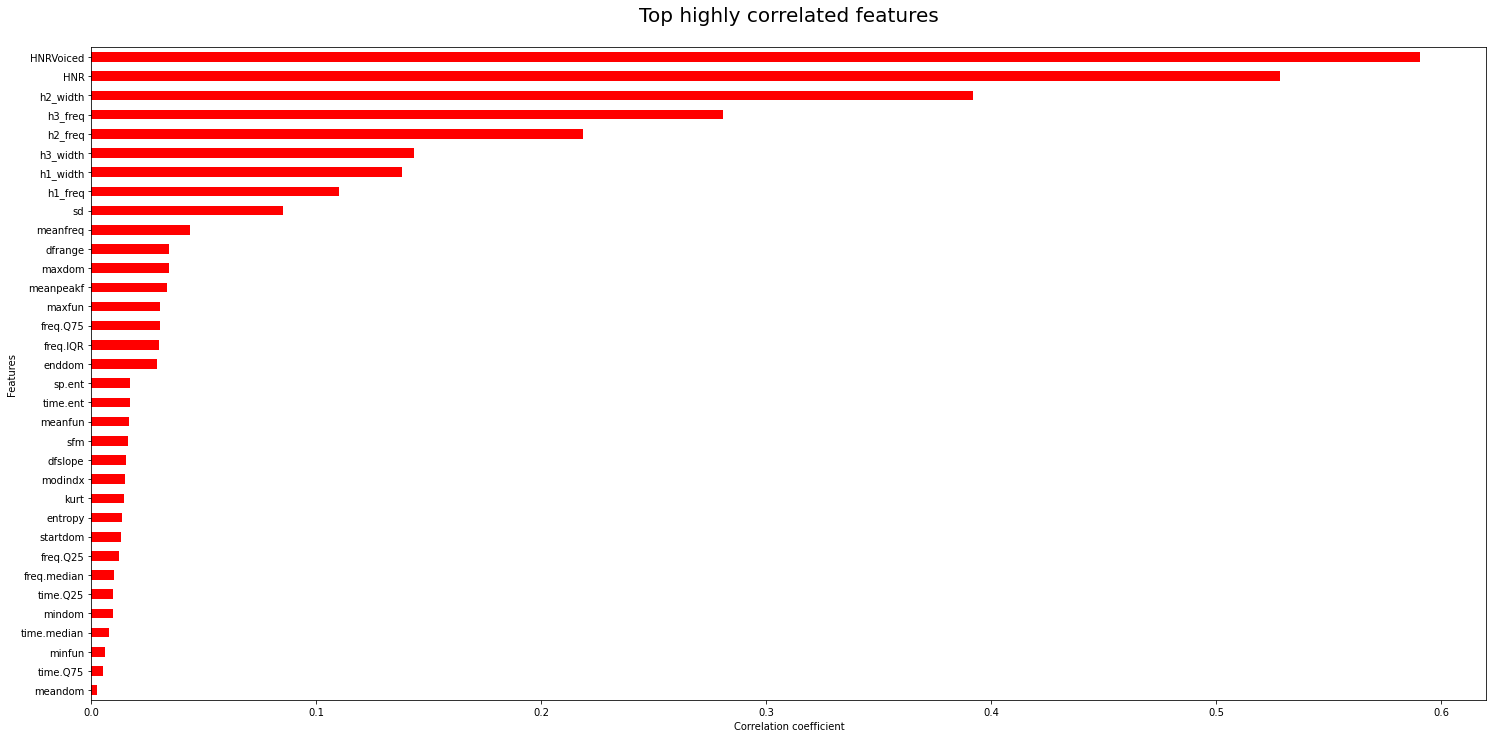

In [6]:
corr_data = dataframe.corr()
selected_pixel_features = corr_data['label'].apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:-2][::-1]
plt.figure(figsize=(25,12))
selected_pixel_features.plot(kind='barh',color='red')
# calculating highest correlated faetures
# with respect to target variable i.e. "convert"
plt.title("Top highly correlated features", size=20, pad=26)
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

In [7]:
x = dataframe.drop('label', axis = 1)
#x = dataframe[['HNRVoiced','HNR']]
y = dataframe['label']
print(x.shape)
print(y.shape)

(7624, 36)
(7624,)


In [8]:
#Splitting Train & Testing Data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6099, 36)
(1525, 36)
(6099,)
(1525,)


In [9]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [10]:
#Finding not constant feature
len(x_train.columns[constant_filter.get_support()])

36

In [11]:
x_train.corr()

,meanfreq,sd,freq.median,freq.Q25,freq.Q75,freq.IQR,time.median,time.Q25,time.Q75,time.IQR,...,HNRVoiced,h1_freq,h1_width,h2_freq,h2_width,h3_freq,h3_width,meanfun,minfun,maxfun
meanfreq,1.000000,0.795590,0.870539,0.603795,0.952023,0.882332,-0.048984,-0.052761,-0.050406,-0.043259,...,-0.074716,0.424484,0.228450,0.392023,-0.017194,0.287206,-0.017504,0.220436,0.166984,0.245190
sd,0.795590,1.000000,0.450117,0.123068,0.830397,0.865721,-0.002590,-0.023713,0.009214,0.026402,...,0.056090,0.280239,0.265789,0.388382,0.129362,0.409930,0.086100,0.120606,0.068648,0.214819
freq.median,0.870539,0.450117,1.000000,0.720723,0.748930,0.635587,-0.065558,-0.059288,-0.075742,-0.076086,...,-0.115452,0.449191,0.216466,0.344145,-0.062363,0.187863,-0.051123,0.245461,0.194146,0.219835
freq.Q25,0.603795,0.123068,0.720723,1.000000,0.425503,0.220479,-0.048509,-0.035872,-0.061101,-0.068007,...,-0.145287,0.326888,0.004712,0.122033,-0.153735,-0.016222,-0.102060,0.202100,0.204851,0.090377
freq.Q75,0.952023,0.830397,0.748930,0.425503,1.000000,0.976502,-0.049437,-0.054377,-0.049123,-0.040516,...,-0.067475,0.383044,0.237334,0.393738,0.009274,0.305765,-0.004775,0.198423,0.136846,0.261679
freq.IQR,0.882332,0.865721,0.635587,0.220479,0.976502,1.000000,-0.041733,-0.050066,-0.038395,-0.027475,...,-0.038128,0.335012,0.254684,0.395322,0.046606,0.333426,0.019158,0.165738,0.098713,0.260523
time.median,-0.048984,-0.002590,-0.065558,-0.048509,-0.049437,-0.041733,1.000000,0.909278,0.966742,0.886561,...,0.064073,-0.033618,-0.016960,-0.012271,0.107722,0.044405,0.081702,-0.031837,-0.047124,0.031422
time.Q25,-0.052761,-0.023713,-0.059288,-0.035872,-0.054377,-0.050066,0.909278,1.000000,0.863110,0.687182,...,0.062497,-0.036356,-0.018942,-0.011750,0.097033,0.030945,0.064165,-0.033286,-0.040538,0.021050
time.Q75,-0.050406,0.009214,-0.075742,-0.061101,-0.049123,-0.038395,0.966742,0.863110,1.000000,0.960001,...,0.065248,-0.030774,-0.019669,-0.014312,0.107892,0.047378,0.085383,-0.033258,-0.049494,0.029995
time.IQR,-0.043259,0.026402,-0.076086,-0.068007,-0.040516,-0.027475,0.886561,0.687182,0.960001,1.000000,...,0.059211,-0.024112,-0.017793,-0.014074,0.101408,0.050998,0.087251,-0.029388,-0.048723,0.031477


In [12]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [13]:
corr_features = correlation(x_train, 0.85)
len(set(corr_features))

10

In [14]:
corr_features

{'dfrange',
 'entropy',
 'freq.IQR',
 'freq.Q75',
 'freq.median',
 'kurt',
 'time.IQR',
 'time.Q25',
 'time.Q75',
 'time.ent'}

In [15]:
x_train = x_train.drop(corr_features,axis=1)
x_test = x_test.drop(corr_features,axis=1)

In [16]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.00111748, 0.00402493, 0.02228073, 0.01042847, 0.00374663,
       0.        , 0.00247098, 0.00625105, 0.        , 0.02498412,
       0.00851453, 0.04564673, 0.00118399, 0.02014027, 0.14053755,
       0.19107041, 0.2424776 , 0.01836356, 0.01595631, 0.03806756,
       0.09964806, 0.07133276, 0.0185774 , 0.29322841, 0.37485997,
       0.18878063])

In [17]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

minfun         0.374860
meanfun        0.293228
HNRVoiced      0.242478
HNR            0.191070
maxfun         0.188781
meanpeakf      0.140538
h2_width       0.099648
h3_freq        0.071333
startdom       0.045647
h2_freq        0.038068
maxdom         0.024984
freq.Q25       0.022281
dfslope        0.020140
h3_width       0.018577
h1_freq        0.018364
h1_width       0.015956
time.median    0.010428
modindx        0.008515
meandom        0.006251
sd             0.004025
skew           0.003747
sfm            0.002471
enddom         0.001184
meanfreq       0.001117
sp.ent         0.000000
mindom         0.000000
dtype: float64

<AxesSubplot:>

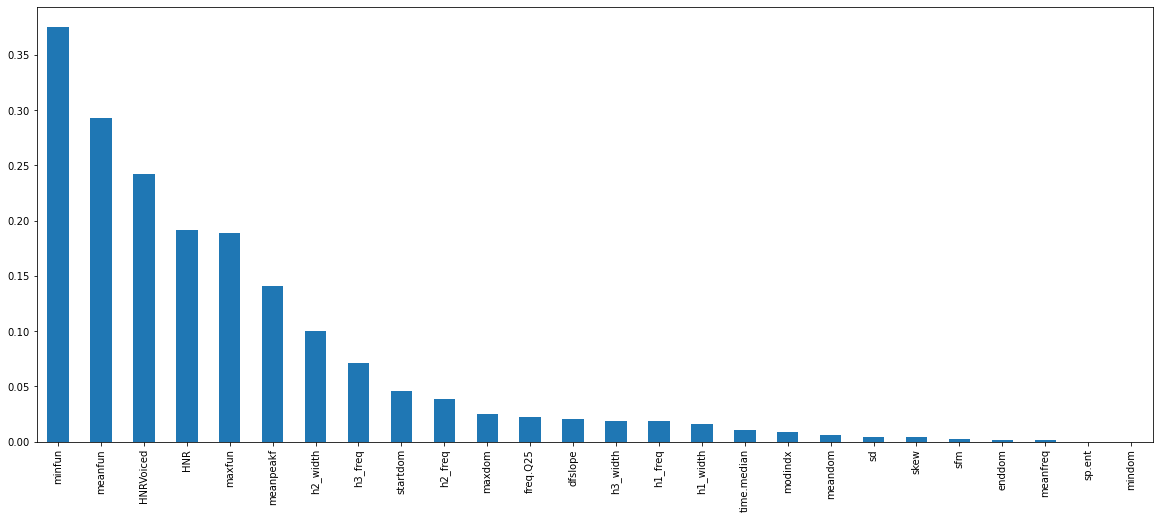

In [18]:
#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [19]:
from sklearn.feature_selection import SelectKBest

In [20]:
 #select the  top 10 important features
sel_ten_cols = SelectKBest(mutual_info_classif, k=10)
sel_ten_cols.fit(x_train, y_train)
cols_to_keep = x_train.columns[sel_ten_cols.get_support()]

In [21]:
cols_to_keep

Index(['startdom', 'meanpeakf', 'HNR', 'HNRVoiced', 'h2_freq', 'h2_width',
       'h3_freq', 'meanfun', 'minfun', 'maxfun'],
      dtype='object')

In [22]:
x_train = x_train.reindex(cols_to_keep, axis=1)
x_test = x_test.reindex(cols_to_keep, axis=1)

In [23]:
x_train

,startdom,meanpeakf,HNR,HNRVoiced,h2_freq,h2_width,h3_freq,meanfun,minfun,maxfun
7186,0.171875,0.110491,9.190898,9.485821,1.913113,0.257564,2.921711,0.334060,0.122327,2.566337
5753,0.265625,0.205357,6.179222,6.726197,1.720926,0.223096,2.699154,0.165580,0.104096,0.252809
5360,0.546875,0.142113,7.078247,8.274101,1.280967,0.238637,2.275037,0.152522,0.115729,0.184783
3789,0.078125,0.236979,9.179892,10.335894,2.104445,0.241160,3.214985,0.250374,0.211920,0.289992
5797,0.015625,0.078869,10.807859,8.640348,2.220547,0.219394,3.367557,0.124791,0.114176,0.176689
...,...,...,...,...,...,...,...,...,...,...
4931,0.453125,0.078869,7.105421,5.464837,1.942066,0.200263,2.568160,0.142758,0.112379,0.279667
3264,0.421875,0.521577,10.427519,10.499615,1.533689,0.241688,2.865996,0.241547,0.185603,0.295281
1653,0.234375,0.173735,7.068535,8.915303,1.498886,0.331441,2.764725,0.192681,0.165049,0.227489
2607,0.734375,0.142113,7.643514,8.143541,1.905914,0.204819,3.051079,0.169240,0.142857,0.221152


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
#Logistic regression model
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
LR_y_pred = LR_model.predict(x_test)

Accuracy_LR_test = "{0:.2f}%".format(accuracy_score(y_test,LR_y_pred)*100)
print("accuracy score using LR model is : ", Accuracy_LR_test)
print('\n')
print("confusion matrix using LR model is : \n", confusion_matrix(y_test, LR_y_pred))
print('\n')
print("classification using LR model is :\n ", classification_report(y_test, LR_y_pred))

accuracy score using LR model is :  80.33%


confusion matrix using LR model is : 
 [[652 137]
 [163 573]]


classification using LR model is :
                precision    recall  f1-score   support

           0       0.80      0.83      0.81       789
           1       0.81      0.78      0.79       736

    accuracy                           0.80      1525
   macro avg       0.80      0.80      0.80      1525
weighted avg       0.80      0.80      0.80      1525



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# using XGB
XGB_model = XGBClassifier(learning_rate=0.8,random_state=0)
XGB_model.fit(x_train,y_train)
XGB_y_pred = XGB_model.predict(x_test)

Accuracy_XGB_test = "{0:.2f}%".format(accuracy_score(y_test,XGB_y_pred)*100)

print("accuracy score using XGB model is : ", Accuracy_XGB_test)
print('\n')
print("confusion matrix using XGB model is :\n ", confusion_matrix(y_test, XGB_y_pred))
print('\n')
print("classification using XGB model is :\n ", classification_report(y_test, XGB_y_pred))

accuracy score using XGB model is :  89.70%


confusion matrix using XGB model is :
  [[715  74]
 [ 83 653]]


classification using XGB model is :
                precision    recall  f1-score   support

           0       0.90      0.91      0.90       789
           1       0.90      0.89      0.89       736

    accuracy                           0.90      1525
   macro avg       0.90      0.90      0.90      1525
weighted avg       0.90      0.90      0.90      1525



In [27]:
#Decision tree model
DT_model = DecisionTreeClassifier(criterion = 'entropy')
DT_model.fit(x_train, y_train)
DT_y_pred = DT_model.predict(x_test)

Accuracy_DT_test = "{0:.2f}%".format(accuracy_score(y_test,DT_y_pred)*100)
print("accuracy score using DT model is : ", Accuracy_DT_test)
print('\n')
print("confusion matrix using DT model is : \n", confusion_matrix(y_test, DT_y_pred))
print('\n')
print("classification using DT model is :\n ", classification_report(y_test, DT_y_pred))

accuracy score using DT model is :  86.62%


confusion matrix using DT model is : 
 [[696  93]
 [111 625]]


classification using DT model is :
                precision    recall  f1-score   support

           0       0.86      0.88      0.87       789
           1       0.87      0.85      0.86       736

    accuracy                           0.87      1525
   macro avg       0.87      0.87      0.87      1525
weighted avg       0.87      0.87      0.87      1525



In [28]:
#using SVM
SVM_model = SVC(kernel = 'linear')
SVM_model.fit(x_train, y_train)
SVM_y_pred = SVM_model.predict(x_test)

Accuracy_SVM_test = "{0:.2f}%".format(accuracy_score(y_test,SVM_y_pred)*100)
print("accuracy score using SVM model is : ", Accuracy_SVM_test)
print('\n')
print("confusion matrix using SVM model is :\n ", confusion_matrix(y_test, SVM_y_pred))
print('\n')
print("classification using SVM model is : \n", classification_report(y_test, SVM_y_pred))

accuracy score using SVM model is :  80.72%


confusion matrix using SVM model is :
  [[664 125]
 [169 567]]


classification using SVM model is : 
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       789
           1       0.82      0.77      0.79       736

    accuracy                           0.81      1525
   macro avg       0.81      0.81      0.81      1525
weighted avg       0.81      0.81      0.81      1525



In [29]:
#using random forest 
RF_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
RF_model.fit(x_train, y_train)
RF_y_pred = RF_model.predict(x_test)

Accuracy_RF_test = "{0:.2f}%".format(accuracy_score(y_test,RF_y_pred)*100)
print("accuracy score using RF model is : ", Accuracy_RF_test)
print('\n')
print("confusion matrix using RF model is :\n ", confusion_matrix(y_test, RF_y_pred))
print('\n')
print("classification using RF model is :\n ", classification_report(y_test, RF_y_pred))

accuracy score using RF model is :  90.56%


confusion matrix using RF model is :
  [[719  70]
 [ 74 662]]


classification using RF model is :
                precision    recall  f1-score   support

           0       0.91      0.91      0.91       789
           1       0.90      0.90      0.90       736

    accuracy                           0.91      1525
   macro avg       0.91      0.91      0.91      1525
weighted avg       0.91      0.91      0.91      1525



In [30]:
# using KNN
KNN_model = KNeighborsClassifier(n_neighbors = 7)
KNN_model.fit(x_train, y_train)
KNN_y_pred = KNN_model.predict(x_test)

Accuracy_KNN_test = "{0:.2f}%".format(accuracy_score(y_test,KNN_y_pred)*100)
print("accuracy score using LR model is : ", Accuracy_KNN_test)
print('\n')
print("confusion matrix using LR model is :\n ", confusion_matrix(y_test, KNN_y_pred))
print('\n')
print("classification using LR model is :\n ", classification_report(y_test, KNN_y_pred))

accuracy score using LR model is :  81.57%


confusion matrix using LR model is :
  [[657 132]
 [149 587]]


classification using LR model is :
                precision    recall  f1-score   support

           0       0.82      0.83      0.82       789
           1       0.82      0.80      0.81       736

    accuracy                           0.82      1525
   macro avg       0.82      0.82      0.82      1525
weighted avg       0.82      0.82      0.82      1525



In [31]:
# using MLP
MLP_model = MLPClassifier(alpha=0.01,activation='relu', batch_size=64,hidden_layer_sizes=(450,), max_iter=550)
MLP_model.fit(x_train,y_train)
MLP_y_pred = MLP_model.predict(x_test)

Accuracy_MLP_test = "{0:.2f}%".format(accuracy_score(y_test,MLP_y_pred)*100)
print("accuracy score using MLP model is : ", Accuracy_MLP_test)
print('\n')
print("confusion matrix using MLP model is :\n ", confusion_matrix(y_test, MLP_y_pred))
print('\n')
print("classification using MLP model is :\n ", classification_report(y_test, MLP_y_pred))

accuracy score using MLP model is :  88.66%


confusion matrix using MLP model is :
  [[728  61]
 [112 624]]


classification using MLP model is :
                precision    recall  f1-score   support

           0       0.87      0.92      0.89       789
           1       0.91      0.85      0.88       736

    accuracy                           0.89      1525
   macro avg       0.89      0.89      0.89      1525
weighted avg       0.89      0.89      0.89      1525



In [32]:
Xlstm_train = x_train.values.reshape(x_train.shape[0], 1, x_train.shape[1])
ylstm_train = np.array(y_train)

In [33]:
#Keras
import keras
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

input_shape = (x_train.shape[0], x_train.shape[1])
print("Build LSTM RNN model ...")
model = Sequential()

model.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=input_shape))
model.add(LSTM(units=32,  dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model.add(Dense(units=y_train.shape[0], activation="softmax"))

print("Compiling ...")
# Keras optimizer defaults:
# Adam   : lr=0.001, beta_1=0.9,  beta_2=0.999, epsilon=1e-8, decay=0.
# RMSprop: lr=0.001, rho=0.9,                   epsilon=1e-8, decay=0.
# SGD    : lr=0.01,  momentum=0.,                             decay=0.
opt = Adam()
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
model.summary()

print("Training ...")
batch_size = 128  # num of training examples per minibatch
num_epochs = 200

model.fit(Xlstm_train, ylstm_train,
    batch_size=batch_size,
    epochs=num_epochs,
)

Build LSTM RNN model ...
Compiling ...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6099, 128)         71168     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense (Dense)                (None, 6099)              201267    
Total params: 293,043
Trainable params: 293,043
Non-trainable params: 0
_________________________________________________________________
Training ...
Epoch 1/200
48/48 [==============================] - 9s 27ms/step - loss: 7.9858 - accuracy: 0.5011
Epoch 2/200
48/48 [==============================] - 1s 28ms/step - loss: 4.2072 - accuracy: 0.5225
Epoch 3/200
48/48 [==============================] - 1s 30ms/step - loss: 1.7656 - accuracy: 0.5225
Epoch 4/200
48/48 [=========

In [34]:
x_test = x_test.values.reshape(x_test.shape[0], 1, x_test.shape[1])
y_test = np.array(y_test)
print("\nTesting ...")
score, accuracy = model.evaluate(
    x_test, y_test, batch_size=batch_size, verbose=1
)


Testing ...
12/12 [==============================] - 2s 24ms/step - loss: 0.2828 - accuracy: 0.8898


In [35]:
Accuracy_LSTM_test = "{0:.2f}%".format(accuracy*100)
print("accuracy score using lstm model is : ", Accuracy_LSTM_test)

accuracy score using lstm model is :  88.98%


In [36]:
table=pd.DataFrame()
table["Model"]=('Logistic Regression','SVM','Decision Tree','MLP','KNN','Random Forest','XGB','LSTM')
table["Accuracy"]=(Accuracy_LR_test,Accuracy_SVM_test,Accuracy_DT_test,Accuracy_MLP_test,Accuracy_KNN_test,Accuracy_RF_test,Accuracy_XGB_test,Accuracy_LSTM_test)
table

,Model,Accuracy
0,Logistic Regression,80.33%
1,SVM,80.72%
2,Decision Tree,86.62%
3,MLP,88.66%
4,KNN,81.57%
5,Random Forest,90.56%
6,XGB,89.70%
7,LSTM,88.98%
